#### About Dataset: 

- CICIDS2017 dataset contains benign and the most up-to-date common attacks, which resembles the true real-world data (PCAPs). It also includes the results of the network traffic analysis using CICFlowMeter with labeled flows based on the time stamp, source, and destination IPs, source and destination ports, protocols and attack (CSV files).

- The data capturing period started at 9 a.m., Monday, July 3, 2017 and ended at 5 p.m. on Friday July 7, 2017, for a total of 5 days.

- Among the different datasets of the 5 days, the dataset from Thursday Morning has been selected. 


#### Below is the details related to the victim and the attacker network details:

Thursday, July 6, 2017
Mornin
g
Web Attack – Brute Force (9:20 – 10 a.m)

Web Attack – XSS (10:15 – 10:35 am.)

Web Attack – Sql Injection (10:40 – 10:42 a.m.)

Attacker: Kali, 205.174.165.73

Victim: WebServer Ubuntu, 205.174.165.68 (Local IP192.168.10.50)



## Data Loading and Exploration

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import hashlib
import seaborn as sns
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
%matplotlib inline

In [2]:
# Load file into df
# We use "engine=python" to avoid the "UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 11: invalid start byte" encoding error.

df = pd.read_csv('data.csv', engine='python') 

In [3]:
# data.csv file contains 170366 records and 79 columns
df.shape

(170366, 79)

In [4]:
# Data types of each column
df.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 79, dtype: object

In [5]:
# Counts of each unique value in the 'Label' column. 
# Provides insight into the distribution of classes in the dataset. 
df[' Label'].value_counts()

 Label
BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name: count, dtype: int64

In [6]:
df.describe()

C:\Users\Alam Rithika\anaconda3\envs\CyberSecurity\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\Alam Rithika\anaconda3\envs\CyberSecurity\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,170366.000000,1.703660e+05,170366.000000,170366.000000,1.703660e+05,1.703660e+05,170366.000000,170366.000000,170366.000000,170366.000000,...,170366.000000,170366.000000,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05,1.703660e+05
mean,7897.090599,1.246354e+07,15.124620,18.022276,5.569859e+02,3.183147e+04,167.775982,22.697786,48.233250,47.235628,...,11.925108,25.584506,7.433804e+04,4.676038e+04,1.646422e+05,5.012699e+04,3.690478e+06,1.310724e+05,3.784764e+06,3.543232e+06
std,18235.489428,3.193852e+07,1123.107756,1494.492871,7.710431e+03,3.460816e+06,461.299214,37.990783,94.947821,141.927429,...,1077.898793,6.354041,6.182048e+05,3.689605e+05,9.958673e+05,5.606797e+05,1.298830e+07,1.733767e+06,1.325135e+07,1.284183e+07
min,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,1.920000e+02,1.000000,1.000000,3.100000e+01,6.000000e+00,23.000000,0.000000,7.882314,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.141200e+04,2.000000,2.000000,6.800000e+01,1.340000e+02,41.000000,6.000000,38.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,443.000000,8.169818e+05,4.000000,2.000000,1.480000e+02,3.280000e+02,60.000000,41.000000,50.000000,17.897858,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65529.000000,1.200000e+08,200755.000000,270686.000000,1.197199e+06,6.270000e+08,23360.000000,1729.000000,4183.057143,5463.493850,...,192491.000000,60.000000,1.030000e+08,6.370000e+07,1.030000e+08,1.030000e+08,1.200000e+08,7.260000e+07,1.200000e+08,1.200000e+08


In [7]:
# Calculates the total number of missing values
df.isnull().sum().sum()

20

- Based on the computation, there are a total of 20 missing values in the dataset. Now, we must identify the specific columns where these missing values occur.

In [8]:
# Check for Missing Values in Each Column
missing_values_per_column = df.isnull().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]

print("Columns with Missing Values:")
print(columns_with_missing_values)

Columns with Missing Values:
Flow Bytes/s    20
dtype: int64


- The column "Flow Bytes/s" has 20 values missing. Decided to delete rows with missing values.
- In my dataset, the column "Flow Bytes/s" exhibits 20 missing values. Considering the extensive size of the dataset, totaling over 100,000 rows, this represents a very small proportion of the overall data. Consequently, opting to remove these rows is a prudent decision. By deleting rows with missing values, we ensure data integrity and maintain the quality of our analysis without compromising the significance of the dataset.

In [9]:
# Drop rows with missing values in the "Flow Bytes/s" column
df_cleaned = df.dropna(subset=['Flow Bytes/s'])

# Check the shape of the cleaned dataset
print("Shape of cleaned dataset after dropping rows with missing values in 'Flow Bytes/s' column:", df_cleaned.shape)

Shape of cleaned dataset after dropping rows with missing values in 'Flow Bytes/s' column: (170346, 79)


## Data Visualization

C:\Users\Alam Rithika\AppData\Local\Temp\ipykernel_226704\2084313396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


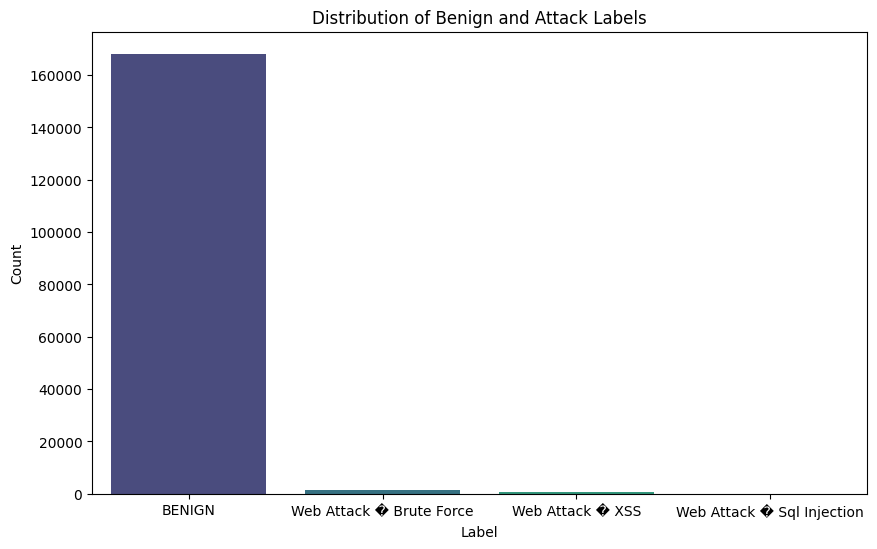

In [10]:
# Check the distribution of labels
label_counts = df[' Label'].value_counts()

# Plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Benign and Attack Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

-  Bar chart showing the distribution of benign and attack labels in the dataset.
-  According to the chart, the label 'BENIGN' has more counts than other labels.
-  There is class imbalance in the dataset. The class 'BENIGN' dominates the dataset, while the other classes represent a smaller proportion of the data. Class imbalance can pose challenges for machine learning algorithms, as they may be biased towards predicting the majority class and perform poorly on minority classes.
-  Hence, techniques such as resampling (oversampling the minority class or undersampling the majority class), using class weights, or using algorithms specifically designed to handle imbalanced data will be used later on in data pre-processing.

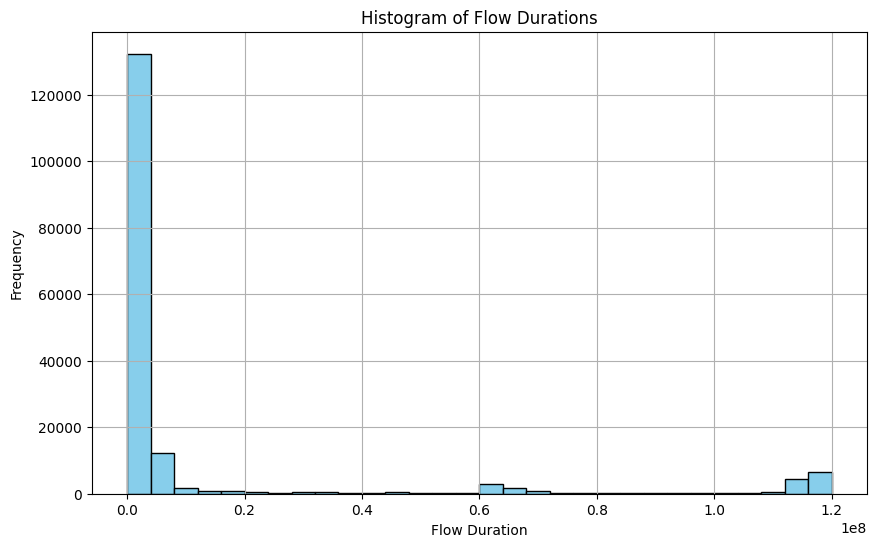

In [11]:
flow_durations = df[' Flow Duration']

# Plot histogram of flow durations
plt.figure(figsize=(10, 6))
plt.hist(flow_durations, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Flow Durations')
plt.grid(True)
plt.show()

1) Skewed Distribution
- The histogram is highly right-skewed, indicating that most of the flow durations are very short, with a few instances having significantly longer durations.
2) Outliers
- There are a few bins on the right side of the histogram with much larger flow durations, suggesting the presence of outliers or anomalous data points.
3) Dominance of Short Durations:
- The majority of the data points have flow durations close to zero, which dominate the histogram.

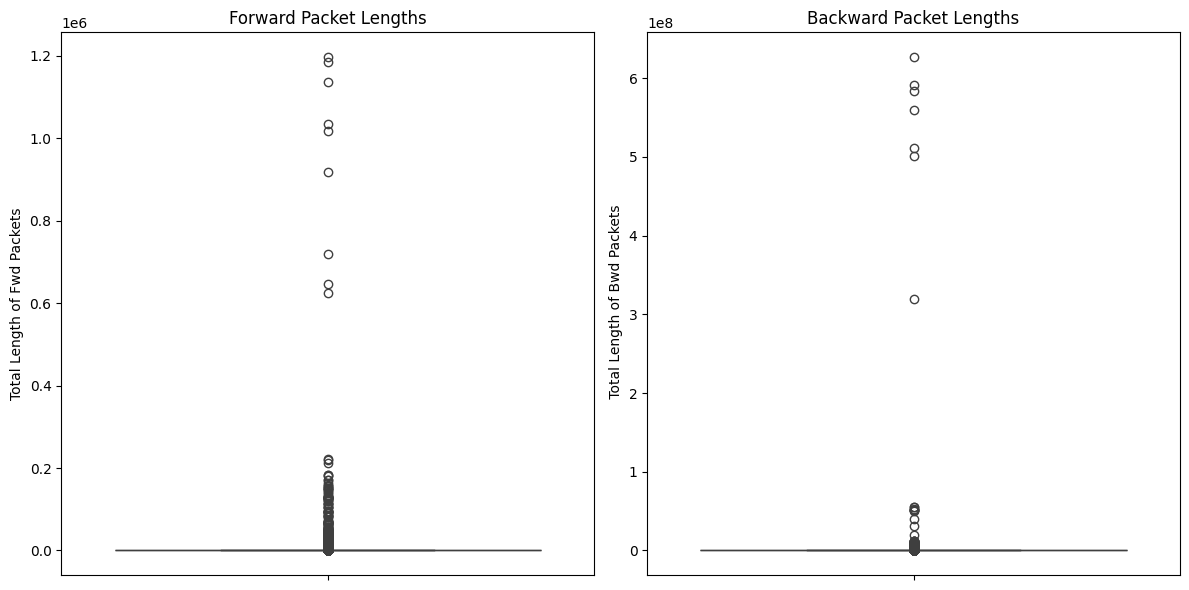

In [12]:
# Packet Length Box Plots
plt.figure(figsize=(12, 6))

# Forward Packet Lengths
plt.subplot(1, 2, 1)
sns.boxplot(y='Total Length of Fwd Packets', data=df)
plt.title('Forward Packet Lengths')

# Backward Packet Lengths
plt.subplot(1, 2, 2)
sns.boxplot(y=' Total Length of Bwd Packets', data=df)
plt.title('Backward Packet Lengths')

plt.tight_layout()
plt.show()


- There are numerous outliers in the forward packet lengths, indicating a significant number of unusually large packets compared to the rest of the data. 
Some outliers extend up to approximately 1.2e6 (1,200,000)
- There are numerous outliers, with some extending to extremely high values (up to 6e8 or 600,000,000). 
This suggests that, although most packet lengths are small, there are a few flows with significantly larger packets in the backward direction. .

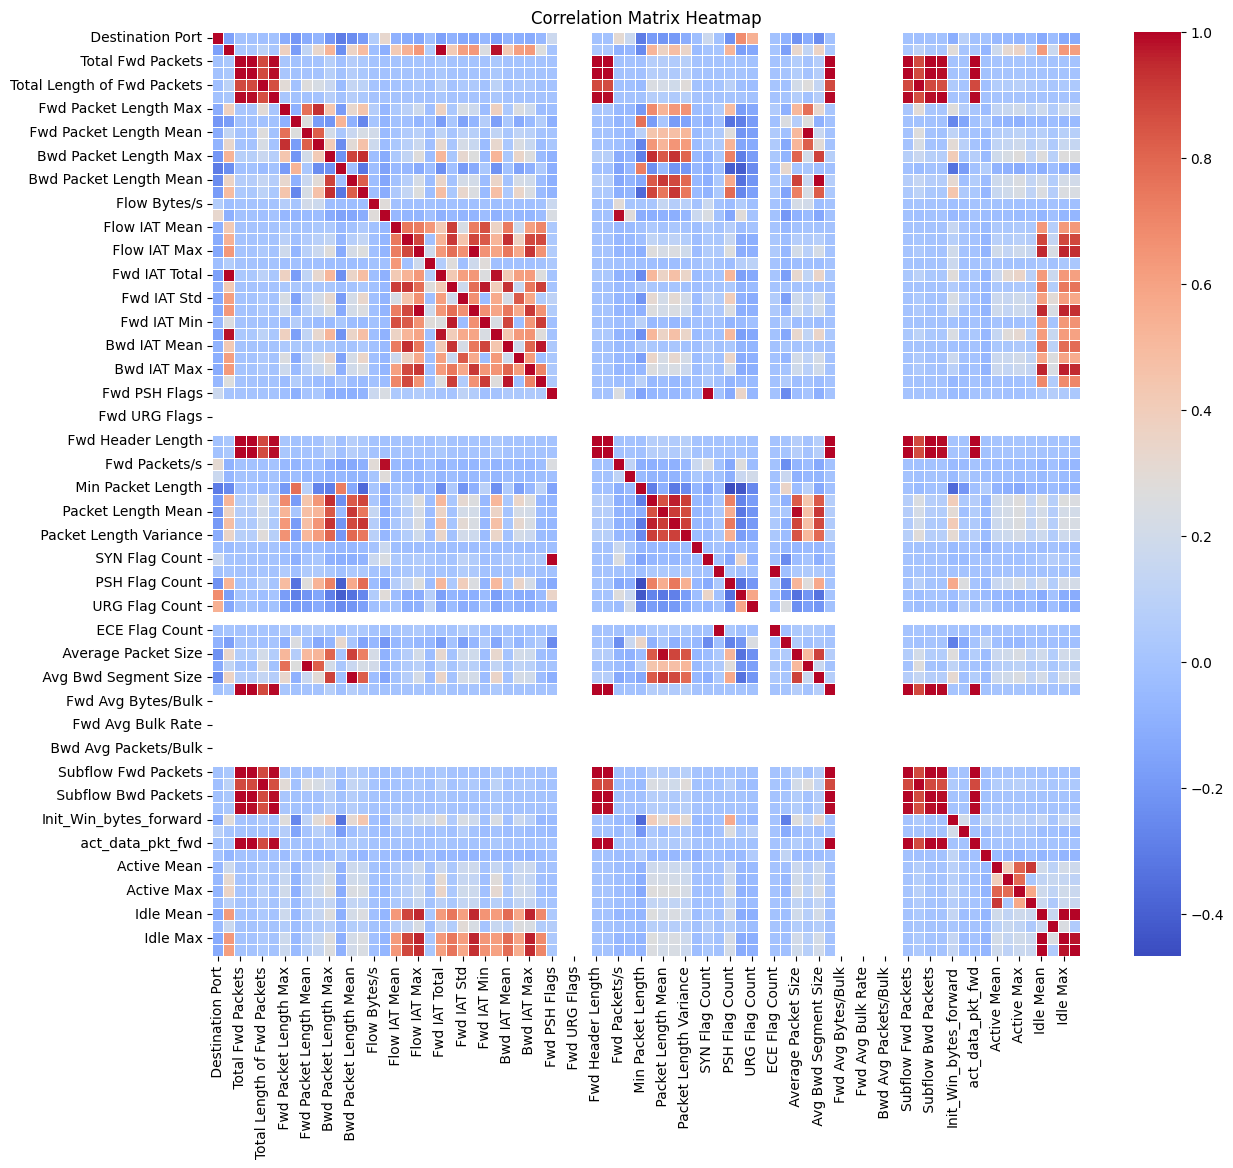

In [13]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float'])

# Compute correlation matrix for numerical features
corr_matrix = numerical_columns.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


1) Identifying Redundant Features

- Features like Fwd Packet Length Mean, Fwd Packet Length Std, Fwd Packed Length Max, and Fwd Packet Length Min are highly correlated. We can retain one of these, such as Fwd Packet Length Mean and remove the rest.

- Backward Packet Lengths: Similarly, Bwd Packet Length Mean, Bwd Packet Length Std, Bwd Packet Length Max, and Bwd Packet Length Min are highly correlated. We can retain Bwd Packet Length Mean and remove the others.

- Flow IAT: Features like Flow IAT Mean, Flow IAT Std, Flow IAT Max, and Flow IAT Min are also highly correlated. We can keep Flow IAT Mean and remove the rest.

- We will be removing these features in data cleaning and pre-processing.

## Data Cleaning & Pre-Processing

In [14]:
print(df.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

- You can notice that there are indeed spaces before some of the column names, as indicated by the leading space character before the column names. This space character is not immediately visible when viewing the column names, but it can affect data manipulation operations and cause issues when referencing the columns.
- 
Therefore, cleaning the column names to remove these leading and trailing whitespaces is an important step in data preprocessing to ensure consistency and avoid potential errors during data analysis or modeling tasks.







In [15]:
# Clean column names by removing leading and trailing whitespaces
df.columns = df.columns.str.strip()

In [16]:
print(df.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

So from the above columns, you can see there are no more inconsistencies

- This function below takes the DataFrame as input, excludes columns with only zero values, and finds duplicate columns among the remaining ones.
  
- Why exclude columns with only zero values? : Columns that contain only zero values might be hashed to the same value, leading to incorrect identification of duplicates. This noise can obscure the identification of truly duplicate columns that have meaningful data. The results of duplicate detection would include these all-zero columns, making it harder to identify duplicates among the columns that contain actual useful data.



In [17]:
def find_non_zero_duplicates(df):
    """
    Exclude columns that have only zero values,
    and find duplicate columns among the remaining columns.

    :param df: DataFrame
    :return: List of lists containing names of duplicate columns
    """
    # Function to hash the column data
    def hash_column(col):
        return hashlib.md5(pd.util.hash_pandas_object(col, index=False).values).hexdigest()

    # Function to check if a column contains only zeros
    def is_all_zero(column):
        return (column == 0).all()

    # Remove columns that have only zero values
    non_zero_df = df.loc[:, ~df.apply(is_all_zero, axis=0)]

    # Dictionary to hold the column hashes
    columns_dict = {}

    # Iterate over the columns and store their hashes
    for col in non_zero_df.columns:
        col_hash = hash_column(non_zero_df[col])
        if col_hash in columns_dict:
            columns_dict[col_hash].append(col)
        else:
            columns_dict[col_hash] = [col]

    # Extract duplicate columns
    duplicate_columns = [cols for cols in columns_dict.values() if len(cols) > 1]

    # Display the results
    print("Duplicate columns (excluding those with all zeros):")
    for cols in duplicate_columns:
        print(" and ".join(cols))

    return duplicate_columns


duplicates = find_non_zero_duplicates(df)


Duplicate columns (excluding those with all zeros):
Total Fwd Packets and Subflow Fwd Packets
Total Backward Packets and Subflow Bwd Packets
Total Length of Fwd Packets and Subflow Fwd Bytes
Fwd Packet Length Mean and Avg Fwd Segment Size
Fwd PSH Flags and SYN Flag Count
Fwd Header Length and Fwd Header Length.1
RST Flag Count and ECE Flag Count


In [18]:
# The columns "Fwd Header Length" and "Fwd Header Length.1" are identical, the second one is removed, 84 columns remain.
df.columns = df.columns.str.strip()
df = df.drop(columns=['Fwd Header Length.1'])
df.shape

(170366, 78)

QN: Why is only one column being removed?
ANS: By retaining columns such as Total Fwd Packets, Total Backward Packets, and their respective subflow counterparts, you maintain crucial information about the flow of network packets. Similarly, features like Fwd Packet Length Mean and Fwd PSH Flags provide valuable insights into packet characteristics and potential network anomalies, making them essential for effective network analysis and monitoring. Hence i did not remove them although they have the same values.

In [19]:
# Encode the 'Label' column
label_encoder = LabelEncoder()
df['Label_Encoded'] = label_encoder.fit_transform(df['Label'])

# Map "BENIGN" to 0 and all other labels to 1
df['Label_Binary'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Display the first few rows to confirm changes
print(df[['Label', 'Label_Encoded', 'Label_Binary']].head(10))

# Display the value counts for the new binary labels
print(df['Label_Binary'].value_counts())

    Label  Label_Encoded  Label_Binary
0  BENIGN              0             0
1  BENIGN              0             0
2  BENIGN              0             0
3  BENIGN              0             0
4  BENIGN              0             0
5  BENIGN              0             0
6  BENIGN              0             0
7  BENIGN              0             0
8  BENIGN              0             0
9  BENIGN              0             0
Label_Binary
0    168186
1      2180
Name: count, dtype: int64


In [20]:
df['Label_Binary'].value_counts()

Label_Binary
0    168186
1      2180
Name: count, dtype: int64

In [21]:
df.drop(['Label', 'Label_Encoded'], axis=1, inplace=True)

- BENIGN is considered as 0 where as other attacks are all classified as 1 
- Next we will see if there are still any categorical columns.

In [22]:
# Get columns with categorical data
categorical_columns = df.select_dtypes(include=['object']).columns

# Check if there are any categorical columns
if len(categorical_columns) > 0:
    print("Categorical columns:")
    print(categorical_columns)
else:
    print("No categorical columns found.")


No categorical columns found.


Now remove the redundant columns that i have mentioned in data visualisation

- Considering the fact that many of the columns have very large values, it would be best to use a technique to scale these values.
- Such techniques ensure that all features contribute proportionally to the analysis, preventing dominance by features with larger magnitudes and enabling more effective modeling or analysis.
- Hence we will be first clipping the values to a reasonable range as some of the values are infinite and apply scaling to all of them. 

In [23]:
# Ensure only numeric columns are considered
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Check for infinite values and replace them
df[numeric_columns] = df[numeric_columns].replace([np.inf, -np.inf], np.nan)

# Check for NaN values and replace them with zero or mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Clip the values to a reasonable range
clip_min = -1e10  # Define a minimum clipping value
clip_max = 1e10   # Define a maximum clipping value
df[numeric_columns] = df[numeric_columns].clip(clip_min, clip_max)

# Apply scaling to all numeric columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [24]:
# Separate features and labels
X = df.drop('Label_Binary', axis=1)
y = df['Label_Binary']


In [25]:
df['Label_Binary'].value_counts()


Label_Binary
0.0    168186
1.0      2180
Name: count, dtype: int64

## Data Modelling

In [26]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [28]:
!pip install scikeras

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from scikeras.wrappers import KerasRegressor  # Updated import statement
from sklearn.model_selection import GridSearchCV

# Define the autoencoder model
def create_autoencoder(encoding_dim=None):
    input_dim = X_resampled.shape[1]
    input_layer = Input(shape=(input_dim,))
    if encoding_dim is not None:
        encoder = Dense(encoding_dim, activation="relu")(input_layer)
    else:
        # Default to a default encoding_dim if none is provided
        encoder = Dense(14, activation="relu")(input_layer)
    decoder = Dense(input_dim, activation='sigmoid')(encoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder


In [35]:
# Hyperparameter tuning
model = KerasRegressor(build_fn=create_autoencoder, verbose=0)  
param_grid = {'epochs': [50, 100], 'batch_size': [16, 32]}  # Removed 'encoding_dim'
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_resampled, X_resampled)


C:\Users\Alam Rithika\anaconda3\envs\CyberSecurity\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Alam Rithika\anaconda3\envs\CyberSecurity\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Alam Rithika\anaconda3\envs\CyberSecurity\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\Alam Rithika\anaconda3\envs\CyberSecurity\lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``buil

In [37]:
# Best parameters
print(f"Best parameters: {grid_result.best_params_}")

Best parameters: {'batch_size': 16, 'epochs': 50}


In [38]:
# Train the autoencoder with best parameters
desired_encoding_dim = 10
best_params = grid_result.best_params_
autoencoder = create_autoencoder(encoding_dim=desired_encoding_dim)
history = autoencoder.fit(X_train, X_train,
                          epochs=best_params['epochs'],
                          batch_size=best_params['batch_size'],
                          validation_split=0.1,
                          verbose=1)

Epoch 1/50
7667/7667 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0255 - val_loss: 6.4994e-04
Epoch 2/50
7667/7667 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 4.4450e-04 - val_loss: 2.5801e-04
Epoch 3/50
7667/7667 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 2.4960e-04 - val_loss: 2.1317e-04
Epoch 4/50
7667/7667 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 2.2198e-04 - val_loss: 1.9692e-04
Epoch 5/50
7667/7667 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 2.0424e-04 - val_loss: 1.8496e-04
Epoch 6/50
7667/7667 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 1.8592e-04 - val_loss: 1.7679e-04
Epoch 7/50
7667/7667 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1.8235e-04 - val_loss: 1.6556e-04
Epoch 8/50
7667/7667 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1.7175e-04 - val_loss: 1.5802e-04
Epoch 9/50
7667/7667 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1.5765e-04 - val_loss: 1.5312e-04
Epoch 10/50
7667/7667 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 1.6055e-04 - val_loss: 1.5254e-04
Epoch 11/50
7667/7667 ━━━━━━━━━━━

In [39]:
# Reconstruct the test set
X_test_reconstructed = autoencoder.predict(X_test)


1065/1065 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [40]:
from sklearn.metrics import mean_squared_error

# Calculate the MSE for each sample
reconstruction_errors = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)


In [41]:
y_test_binary = np.where(y_test > 0, 1, 0)

# Define a threshold (using either mean or standard deviation)
threshold = np.mean(reconstruction_errors) + 0.5 * np.std(reconstruction_errors)

# Anomaly detection
predicted_labels = np.where(reconstruction_errors > threshold, 1, 0)


In [42]:
# Performance Metrics
# Calculate TP, TN, FP, FN
TP = np.sum((predicted_labels == 1) & (y_test == 1))
TN = np.sum((predicted_labels == 0) & (y_test == 0))
FP = np.sum((predicted_labels == 1) & (y_test == 0))
FN = np.sum((predicted_labels == 0) & (y_test == 1))

In [43]:
# Calculate total number of anomalies and normal instances
total_anomalies = np.sum(y_test)
total_normals = len(y_test) - total_anomalies

In [44]:
# Calculate average and standard deviation for normal and anomaly instances
average_normal = np.mean(reconstruction_errors[y_test == 0])
std_normal = np.std(reconstruction_errors[y_test == 0])
average_anomaly = np.mean(reconstruction_errors[y_test == 1])
std_anomaly = np.std(reconstruction_errors[y_test == 1])

In [45]:
# Number of anomalies above each threshold
anomalies_above_threshold = np.sum(reconstruction_errors > threshold)

# Total number of true positives
total_TP = TP

In [48]:
# Print the metrics
print(f"Threshold: {threshold}")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Total Anomalies: {total_anomalies}")
print(f"Total Normals: {total_normals}")
print(f"Average Reconstruction Error for Normals: {average_normal}")
print(f"Standard Deviation of Reconstruction Error for Normals: {std_normal}")
print(f"Average Reconstruction Error for Anomalies: {average_anomaly}")
print(f"Standard Deviation of Reconstruction Error for Anomalies: {std_anomaly}")
print(f"Number of Anomalies above Threshold: {anomalies_above_threshold}")
print(f"Total True Positives: {total_TP}")

Threshold: 0.00045341964411472926
True Positives (TP): 371
True Negatives (TN): 30003
False Positives (FP): 1680
False Negatives (FN): 93
Total Anomalies: 464.0
Total Normals: 33610.0
Average Reconstruction Error for Normals: 0.00010606396996259603
Standard Deviation of Reconstruction Error for Normals: 0.0006991679305701999
Average Reconstruction Error for Anomalies: 0.00011319298406956352
Standard Deviation of Reconstruction Error for Anomalies: 0.00011314689323729947
Number of Anomalies above Threshold: 888
Total True Positives: 371


### Evaluation:
I've evaluated my autoencoder model, and here are the results:

I set the threshold at 0.000453 to distinguish between anomalies and normal instances.
I correctly identified 371 anomalies (True Positives), meaning I caught 371 out of the total 464 anomalies in my dataset.
I accurately recognized 30,003 normal instances (True Negatives) out of the total 33,610 normal instances.
However, I also misclassified 1,680 normal instances as anomalies (False Positives) and missed 93 anomalies (False Negatives).
On average, the reconstruction error for my normal instances was 0.000106, with a standard deviation of 0.000699.
For anomalies, the average reconstruction error was slightly higher at 0.000113, with a standard deviation of 0.000113.
A total of 888 anomalies had reconstruction errors above my chosen threshold.
Overall, while I did a decent job in identifying anomalies, there's still room for improvement, especially in reducing false positives and false negatives. I might need to fine-tune my model or adjust the threshold to enhance its performance